# NHANES Data Analysis

## Imports

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## Loading data

In [2]:
data = pd.read_csv("../data/nhanes.csv")

In [3]:
data.sample(10)

,Unnamed: 0,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
1808,1809,55368,2009_10,male,51,50-59,620.0,Black,NaN,High School,...,No,NaN,No,Yes,18.0,3.0,0.0,No,Heterosexual,NaN
8534,8535,69051,2011_12,female,5,0-9,NaN,White,White,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5496,5497,63084,2011_12,male,4,0-9,NaN,White,White,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3603,3604,59171,2009_10,female,74,70+,897.0,White,NaN,High School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,2717,57375,2009_10,male,39,30-39,469.0,White,NaN,Some College,...,No,NaN,No,Yes,17.0,20.0,0.0,No,Heterosexual,NaN
5362,5363,62855,2011_12,female,47,40-49,NaN,White,White,Some College,...,No,NaN,No,Yes,16.0,1.0,0.0,No,Heterosexual,NaN
2853,2854,57660,2009_10,female,19,10-19,238.0,Mexican,NaN,NaN,...,No,NaN,No,Yes,17.0,1.0,0.0,No,Heterosexual,NaN
7220,7221,66501,2011_12,male,0,0-9,6.0,Mexican,Mexican,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5326,5327,62793,2011_12,male,72,70+,NaN,White,White,High School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2633,2634,57208,2009_10,male,46,40-49,559.0,White,NaN,College Grad,...,No,NaN,No,Yes,23.0,9.0,1.0,No,Heterosexual,NaN


In [4]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,8894,NaN,NaN,NaN,4447.5,2567.62,1,2224.25,4447.5,6670.75,8894
ID,8894,NaN,NaN,NaN,60840.2,5261.05,51624,56288.2,60930.5,65418.8,69734
SurveyYr,8894,2,2009_10,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8894,2,female,4466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8894,NaN,NaN,NaN,36.7778,22.4233,0,17,36,54,80
AgeDecade,8601,8,40-49,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeMonths,4937,NaN,NaN,NaN,422.206,258.035,0,203,420,625,959
Race1,8894,5,White,5659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race3,3894,6,White,2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,6421,5,Some College,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 77 columns):
Unnamed: 0          8894 non-null int64
ID                  8894 non-null int64
SurveyYr            8894 non-null object
Gender              8894 non-null object
Age                 8894 non-null int64
AgeDecade           8601 non-null object
AgeMonths           4937 non-null float64
Race1               8894 non-null object
Race3               3894 non-null object
Education           6421 non-null object
MaritalStatus       6432 non-null object
HHIncome            8164 non-null object
HHIncomeMid         8164 non-null float64
Poverty             8239 non-null float64
HomeRooms           8834 non-null float64
HomeOwn             8841 non-null object
Work                6919 non-null object
Weight              8825 non-null float64
Length              490 non-null float64
HeadCirc            74 non-null float64
Height              8570 non-null float64
BMI                 8562 non-n

## Exploratory Data Analysis

### Nullity Analysis

#### Check proportion of missing values

In [6]:
data.isna().mean()

Unnamed: 0          0.000000
ID                  0.000000
SurveyYr            0.000000
Gender              0.000000
Age                 0.000000
AgeDecade           0.032944
AgeMonths           0.444907
Race1               0.000000
Race3               0.562177
Education           0.278053
MaritalStatus       0.276816
HHIncome            0.082078
HHIncomeMid         0.082078
Poverty             0.073645
HomeRooms           0.006746
HomeOwn             0.005959
Work                0.222060
Weight              0.007758
Length              0.944907
HeadCirc            0.991680
Height              0.036429
BMI                 0.037329
BMICatUnder20yrs    0.888239
BMI_WHO             0.039915
Pulse               0.143468
BPSysAve            0.144817
BPDiaAve            0.144817
BPSys1              0.175736
BPDia1              0.175736
BPSys2              0.165505
                      ...   
nPregnancies        0.738251
nBabies             0.758039
Age1stBaby          0.812795
SleepHrsNight 

In [7]:
toKeep = ["Gender", "Age", "Race1", "Education", "HHIncomeMid", "Weight", "Height", "BMI", "Pulse", "BPSysAve", "BPDiaAve", "TotChol", "PhysActiveDays", "AlcoholYear", "SmokeAge", "Diabetes"]
data = data.loc[data["Age"] >= 20, toKeep]

In [9]:
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

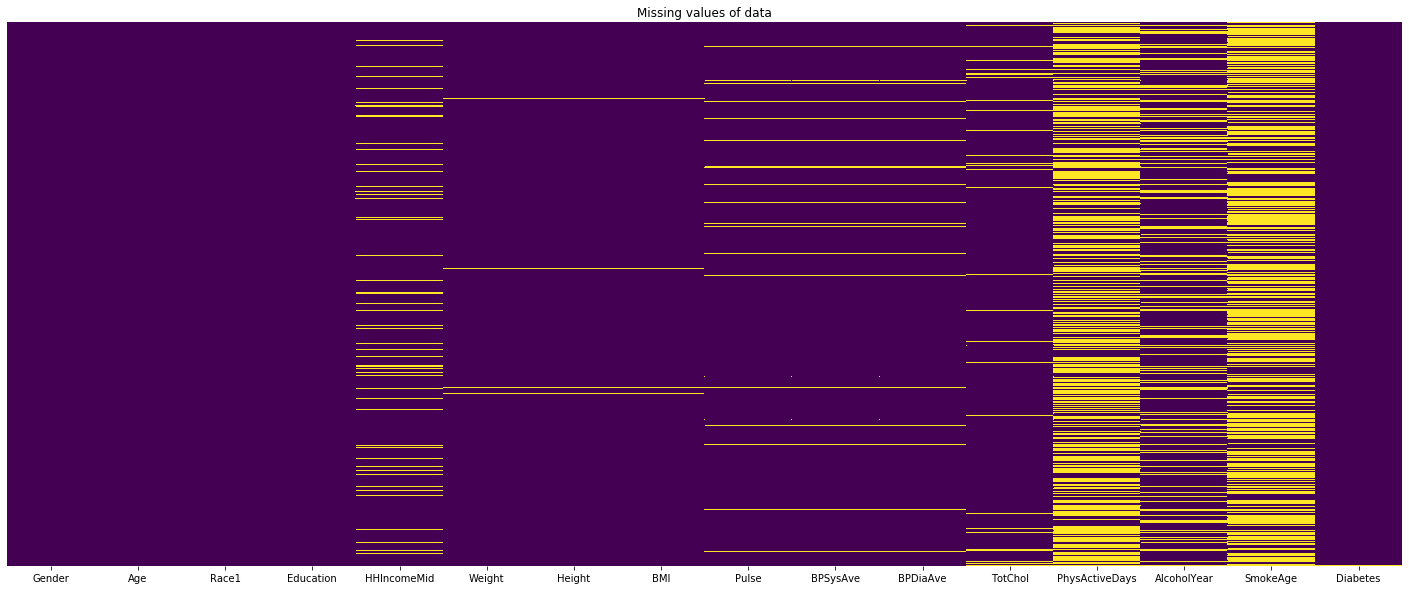

In [12]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False);
plt.title("Missing values of data");

In [13]:
data.sample(10)

,Gender,Age,Race1,Education,HHIncomeMid,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,TotChol,PhysActiveDays,AlcoholYear,SmokeAge,Diabetes
4299,female,64,White,Some College,70000.0,66.5,159.5,26.10,74.0,127.0,65.0,5.12,4.0,24.0,NaN,No
3335,male,49,Black,Some College,NaN,56.8,169.6,19.75,68.0,125.0,77.0,4.91,3.0,0.0,12.0,No
4152,male,48,Mexican,8th Grade,NaN,100.8,161.9,38.50,92.0,162.0,106.0,5.56,NaN,52.0,16.0,No
4740,male,48,White,Some College,50000.0,66.5,180.2,20.50,68.0,91.0,66.0,NaN,NaN,0.0,NaN,No
4310,female,49,White,Some College,70000.0,78.6,164.8,28.90,64.0,114.0,59.0,5.04,NaN,12.0,NaN,No
5846,female,78,Other,Some College,17500.0,81.6,160.5,31.70,54.0,142.0,50.0,5.43,3.0,NaN,NaN,No
1436,male,60,White,College Grad,NaN,89.8,179.1,28.00,72.0,134.0,81.0,4.34,2.0,12.0,NaN,No
934,female,49,White,High School,87500.0,97.8,164.3,36.23,54.0,98.0,71.0,5.48,NaN,24.0,NaN,No
6213,female,30,Black,High School,22500.0,187.5,164.8,69.00,74.0,108.0,72.0,4.42,NaN,5.0,NaN,No
2052,female,54,White,Some College,87500.0,126.2,176.0,40.74,66.0,105.0,76.0,5.69,NaN,12.0,NaN,No


### Functions for imputing null values

In [14]:
def get_education(data):
    """
    Filling in missing values for education
    """
    ed = []
    for i in range(len(data)):
        e = data["Education"][i]
        
        if pd.isna(e):
            age = data["Age"][i]
            e = data[data["Age"] == age]["Education"].mode()[0]
        ed.append(e)
    data["Education"] = ed

def calc_income(data):
    """
    Filling in the missing values for income
    """
    m = data["HHIncomeMid"].median()
    data["HHIncomeMid"].fillna(m, inplace=True)

def calc_weight(data):
    """
    Fill in the missing values of weight based on gender
    """
    genders = data["Gender"].unique()
    for gen in genders:
        w = data[data["Gender"] == gen]["Weight"].mean()
        
        data.loc[data["Gender"] == gen, "Weight"] = data[data["Gender"] == gen]["Weight"].fillna(w)

def calc_height(data):
    """
    Fill in the missing values of weight based on gender
    """
    genders = data["Gender"].unique()
    for gen in genders:
        # Using the mean because the distribution of heights for each gender are left skewed
        h = data[data["Gender"] == gen]["Height"].median()
        
        data.loc[data["Gender"] == gen, "Height"] = data[data["Gender"] == gen]["Height"].fillna(h)

def calc_BMI(data):
    """
    Fill in missing values of BMI using formula 
    
    BMI = Weight (kg) / Height^2 (m^2)
    """
    
    weight = data["Weight"]
    height_in_m = data["Height"] / 100
    
    bmi = weight / (height_in_m**2)
    
    data["BMI"] = bmi

def calc_pulse(data):
    """
    Fill in missing values of pulse with mean
    """
    m = data["Pulse"].mean()
    data["Pulse"].fillna(m, inplace=True)


def calc_sys(data):
    """
    Fill in missing values of systolic with mean
    """
    m = data["BPSysAve"].mean()
    data["BPSysAve"].fillna(m, inplace=True)
    
    
def calc_dia(data):
    """
    Fill in missing values of diastolic with mean
    """
    m = data["BPDiaAve"].mean()
    data["BPDiaAve"].fillna(m, inplace=True)

    
def calc_chol(data):
    """
    Fill in missing values of cholesterol with mean
    """
    m = data["TotChol"].mean()
    data["TotChol"].fillna(m, inplace=True)


def calc_active(data):
    """
    Fill in missing values of physically active days
    """
    data["PhysActiveDays"].fillna(0, inplace=True)

    
def alc_year(data):
    """
    Fill in missing values of alcohol year
    """
    data["AlcoholYear"].fillna(0, inplace=True)


def smoke_age(data):
    """
    Fill in missing values of smoking age
    """
    data["SmokeAge"].fillna(0, inplace=True)

In [15]:
def run_all(data):
    get_education(data)
    calc_income(data)
    calc_weight(data)
    calc_height(data)
    calc_BMI(data)
    calc_pulse(data)
    calc_sys(data)
    calc_dia(data)
    calc_chol(data)
    calc_active(data)
    alc_year(data)
    smoke_age(data)

In [16]:
run_all(data)

In [17]:
# dropping the rows where there are missing values for Diabetes
data.dropna(subset=["Diabetes"], inplace=True)

In [18]:
data.reset_index(inplace=True)

In [19]:
data.drop(["index"], axis=1, inplace=True)

In [20]:
data.isna().mean()

Gender            0.0
Age               0.0
Race1             0.0
Education         0.0
HHIncomeMid       0.0
Weight            0.0
Height            0.0
BMI               0.0
Pulse             0.0
BPSysAve          0.0
BPDiaAve          0.0
TotChol           0.0
PhysActiveDays    0.0
AlcoholYear       0.0
SmokeAge          0.0
Diabetes          0.0
dtype: float64

Now that we've imputed the missing values, we can move on

### One-hot encoding categorical variables

In [21]:
cat_cols = ["Gender", "Race1", "Education"]

for col in cat_cols:
    print(col)
    dummies = pd.get_dummies(data[col])
    data = pd.concat([data, dummies], axis=1)
    data.drop([col], axis=1, inplace=True)
    

Gender
Race1
Education


In [65]:
clss = data["Diabetes"]
data.drop("Diabetes", axis=1, inplace=True)
data = pd.concat([data, clss], axis=1)

In [66]:
data.sample(10)

,Age,HHIncomeMid,Weight,Height,BMI,Pulse,BPSysAve,BPDiaAve,TotChol,PhysActiveDays,...,Hispanic,Mexican,Other,White,8th Grade,9 - 11th Grade,College Grad,High School,Some College,Diabetes
4232,80,87500.0,80.8,164.9,29.714611,62.000000,122.000000,59.000000,3.54,0.0,...,0,0,0,1,0,0,0,1,0,No
6327,25,12500.0,64.6,165.7,23.528135,72.411149,120.970954,70.005164,4.32,3.0,...,0,0,0,1,0,0,0,0,1,No
3447,26,30000.0,149.0,170.3,51.375608,72.000000,103.000000,77.000000,5.09,0.0,...,0,0,0,1,0,0,0,1,0,No
1986,33,87500.0,85.7,175.5,27.824449,74.000000,100.000000,67.000000,4.71,0.0,...,0,0,1,0,0,0,1,0,0,No
5825,30,2500.0,76.9,175.7,24.910521,52.000000,116.000000,68.000000,3.80,0.0,...,0,0,0,0,0,0,0,1,0,No
3313,80,30000.0,59.8,175.0,19.526531,80.000000,147.000000,90.000000,3.54,0.0,...,0,0,0,1,1,0,0,0,0,No
3170,30,40000.0,83.5,178.3,26.265386,70.000000,99.000000,65.000000,3.78,5.0,...,0,0,0,1,0,0,1,0,0,No
1350,21,40000.0,54.4,160.8,21.039083,70.000000,110.000000,41.000000,3.96,1.0,...,0,0,0,1,0,0,0,1,0,No
1562,26,17500.0,80.8,183.3,24.048414,72.000000,111.000000,68.000000,4.50,0.0,...,0,0,0,0,0,1,0,0,0,No
4861,65,12500.0,45.9,149.6,20.509237,102.000000,116.000000,0.000000,5.07,1.0,...,0,0,0,1,0,1,0,0,0,No


In [102]:
X = data.drop("Diabetes", axis=1)
y = data["Diabetes"]

### Count the classes

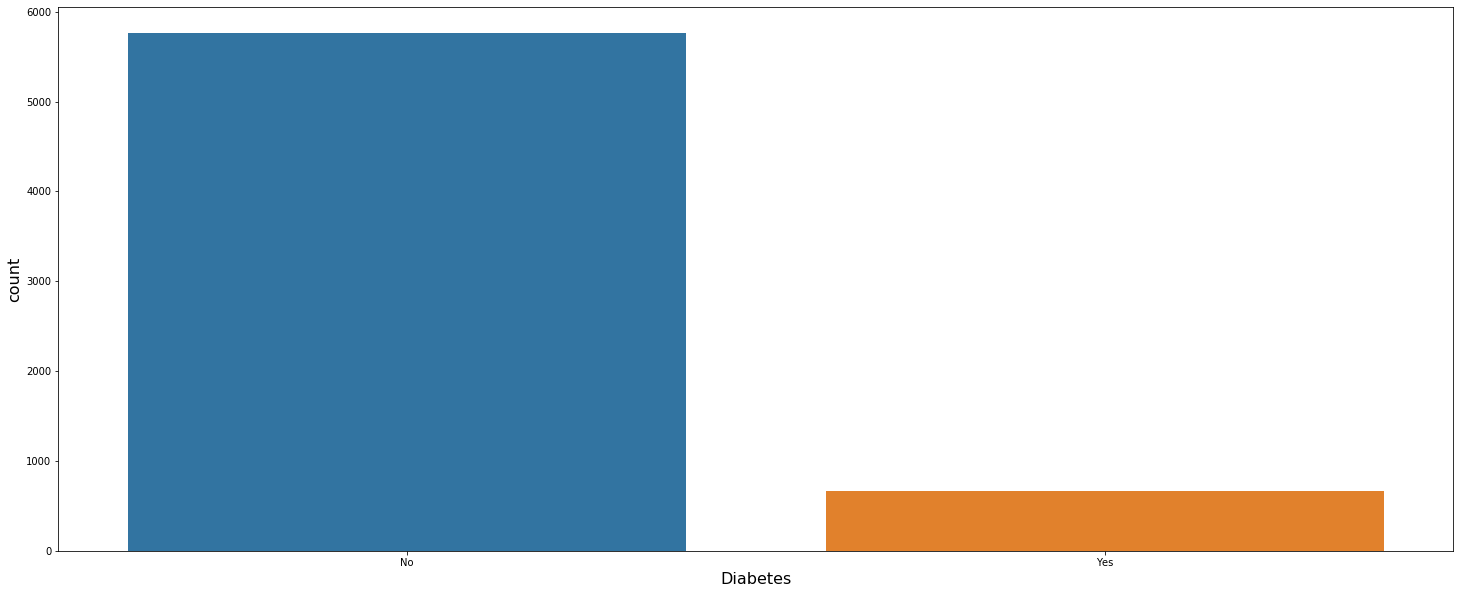

In [103]:
sns.countplot(y);

#### Using SMOTE to fix class imbalance

In [104]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [105]:
oversampled_trainX, oversampled_trainY = sm.fit_sample(X, y)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = data.columns

X = oversampled_train.drop(["Diabetes"], axis=1)
y = oversampled_train["Diabetes"]

### Univariate Analysis

#### Gender

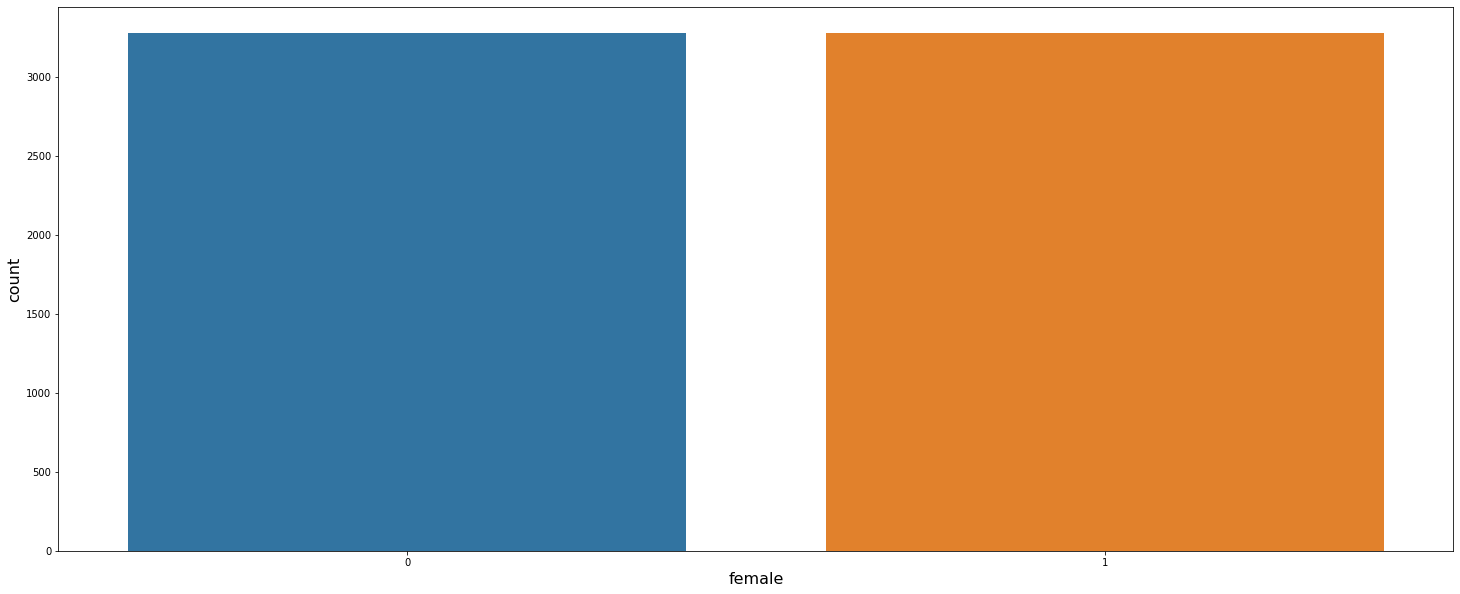

In [51]:
for gen in ["male", "female"]:
    sns.countplot(data["male"]);
    sns.countplot(data["female"]);

#### Age

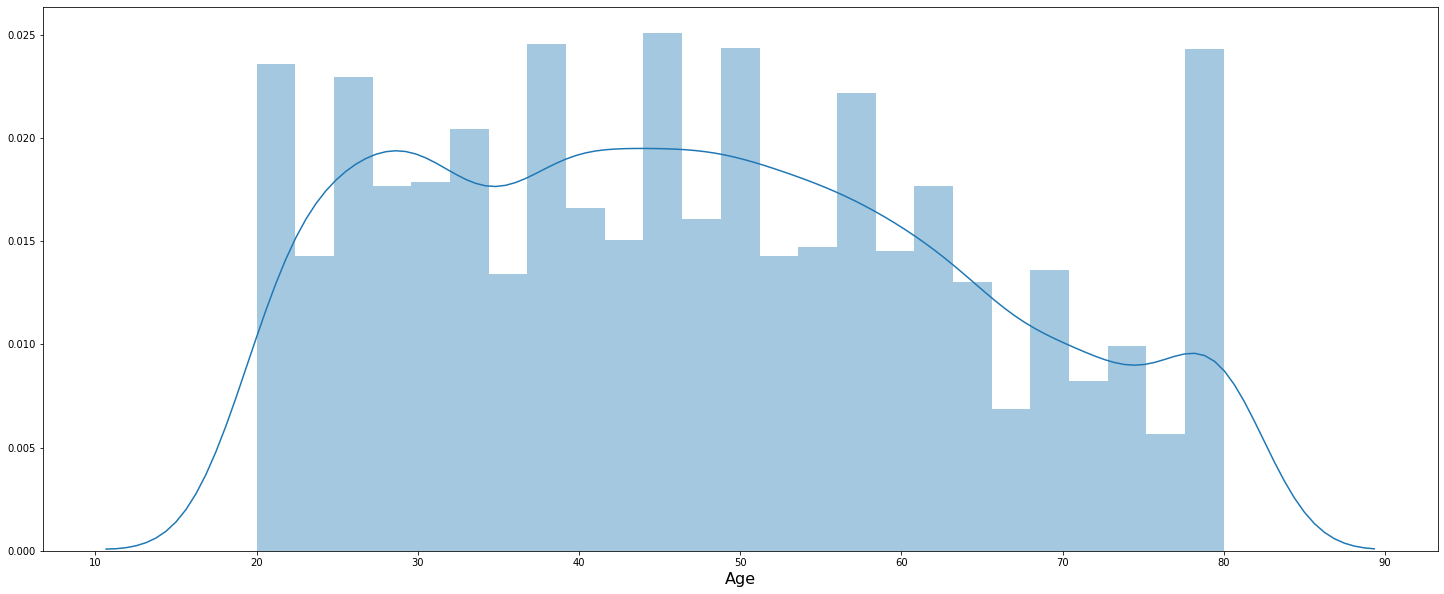

In [52]:
sns.distplot(data["Age"], bins=25);

#### Race

<BarContainer object of 5 artists>

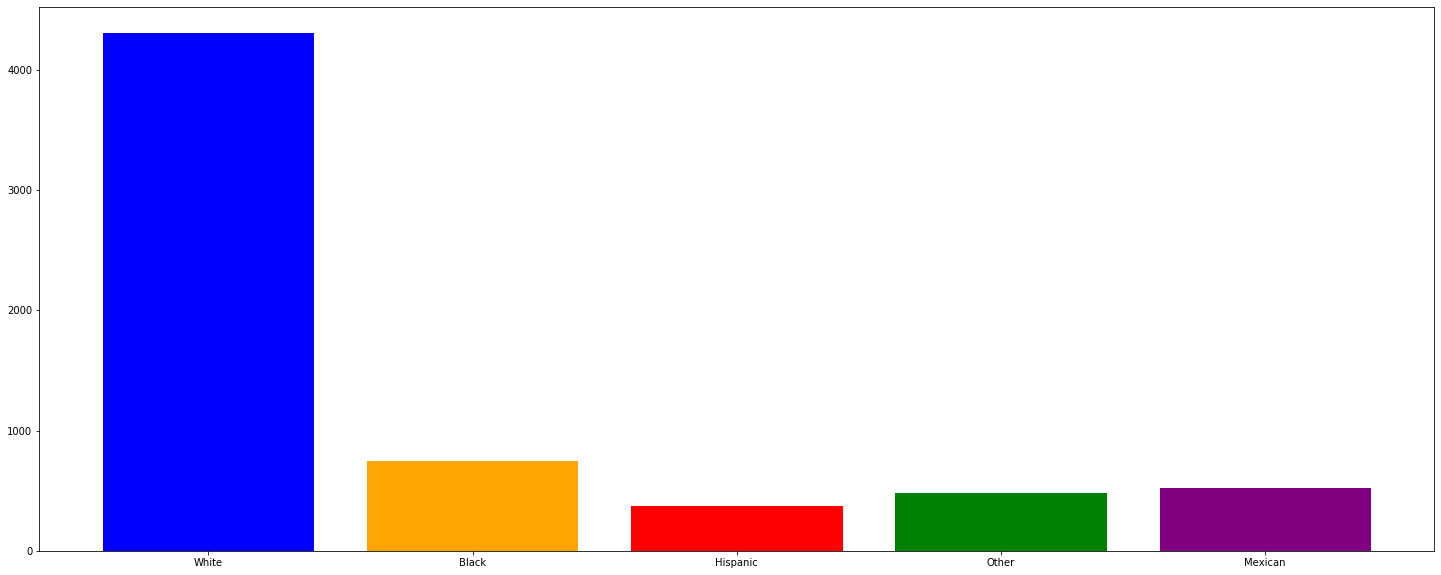

In [53]:
races = ["White", "Black", "Hispanic", "Other", "Mexican"]

plt.bar(x=races, height=data[races].sum(), color=["Blue", "Orange", "Red", "Green", "Purple"])

#### Income

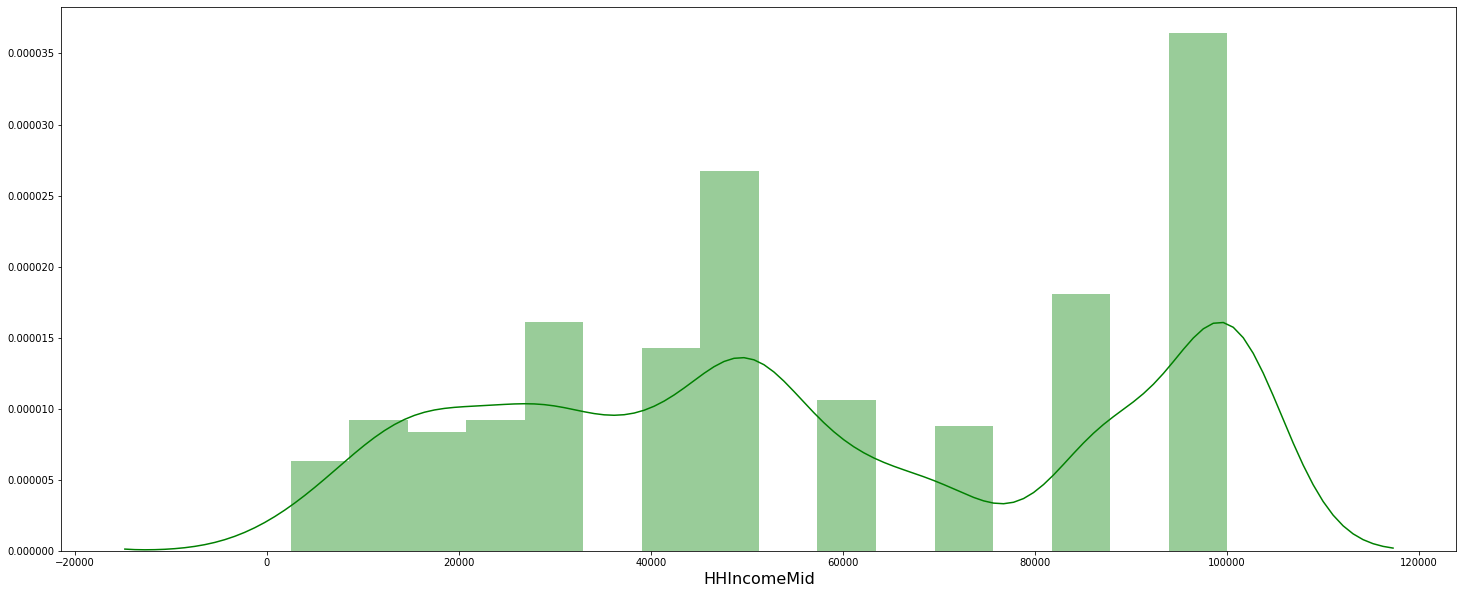

In [54]:
sns.distplot(data["HHIncomeMid"], color="green");

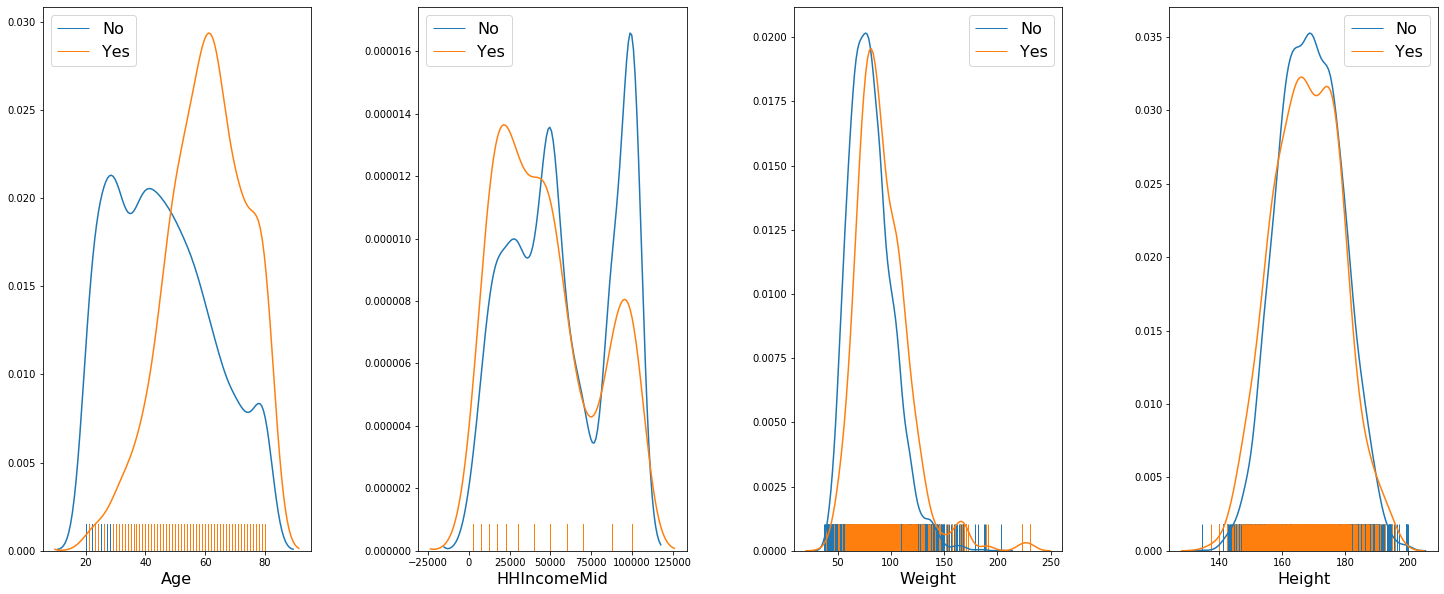

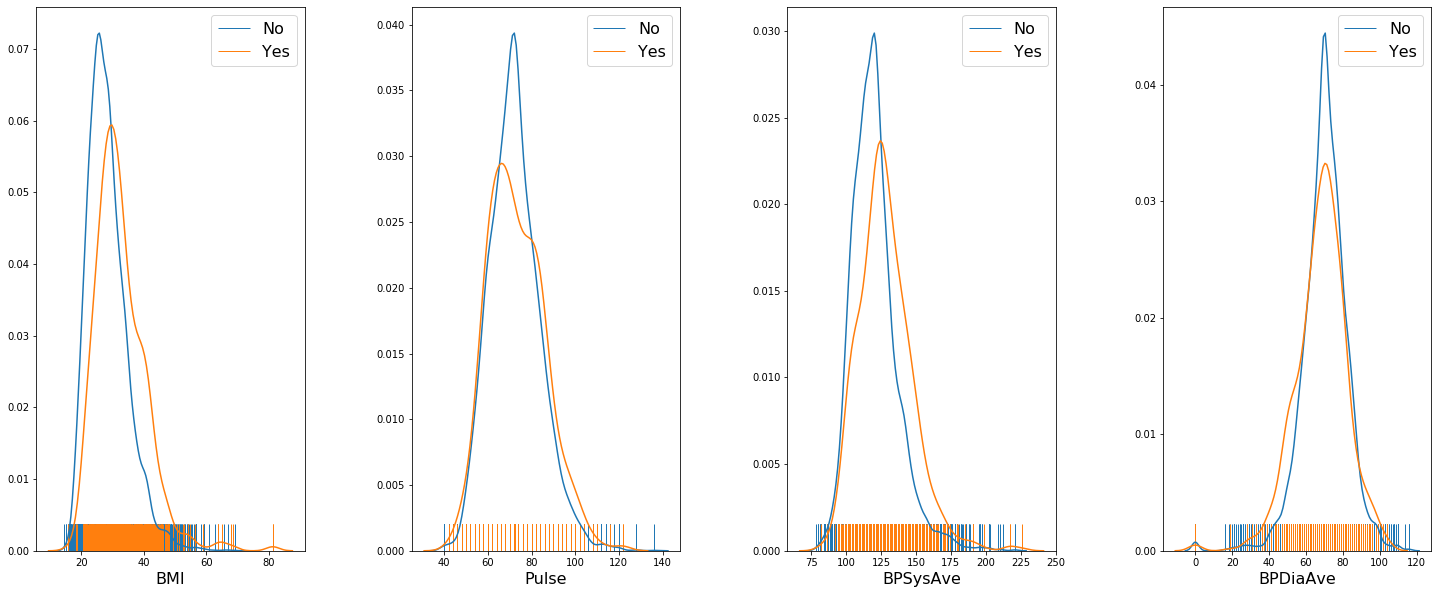

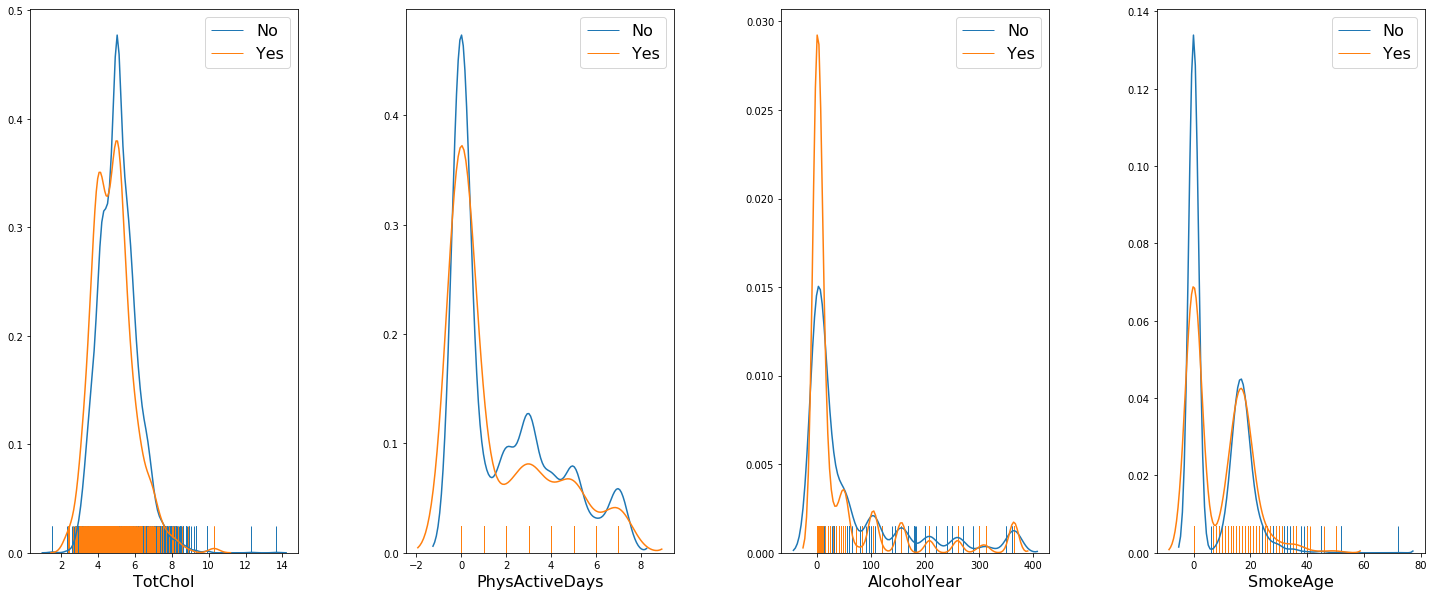

In [31]:
for i in range(0, 12, 4):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, 4, 1)
    sns.distplot(data.loc[data["Diabetes"]=="No", :][data.columns[i]], hist=False, rug=True);
    sns.distplot(data.loc[data["Diabetes"]=="Yes", :][data.columns[i]], hist=False, rug=True);
    plt.legend(["No", "Yes"]);
    ax = fig.add_subplot(1, 4, 2)
    sns.distplot(data.loc[data["Diabetes"]=="No", :][data.columns[i+1]], hist=False, rug=True);
    sns.distplot(data.loc[data["Diabetes"]=="Yes", :][data.columns[i+1]], hist=False, rug=True);
    plt.legend(["No", "Yes"]);
    ax = fig.add_subplot(1, 4, 3)
    sns.distplot(data.loc[data["Diabetes"]=="No", :][data.columns[i+2]], hist=False, rug=True);
    sns.distplot(data.loc[data["Diabetes"]=="Yes", :][data.columns[i+2]], hist=False, rug=True);
    plt.legend(["No", "Yes"]);
    ax = fig.add_subplot(1, 4, 4)
    sns.distplot(data.loc[data["Diabetes"]=="No", :][data.columns[i+3]], hist=False, rug=True);
    sns.distplot(data.loc[data["Diabetes"]=="Yes", :][data.columns[i+3]], hist=False, rug=True);
    plt.legend(["No", "Yes"]);

We can see that almost none of the variables create any sort of separation to determine if a patient has diabetes or not.

### Bivariate Analysis

/Users/stiwari/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/stiwari/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/stiwari/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Users/stiwari/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/stiwari/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Us

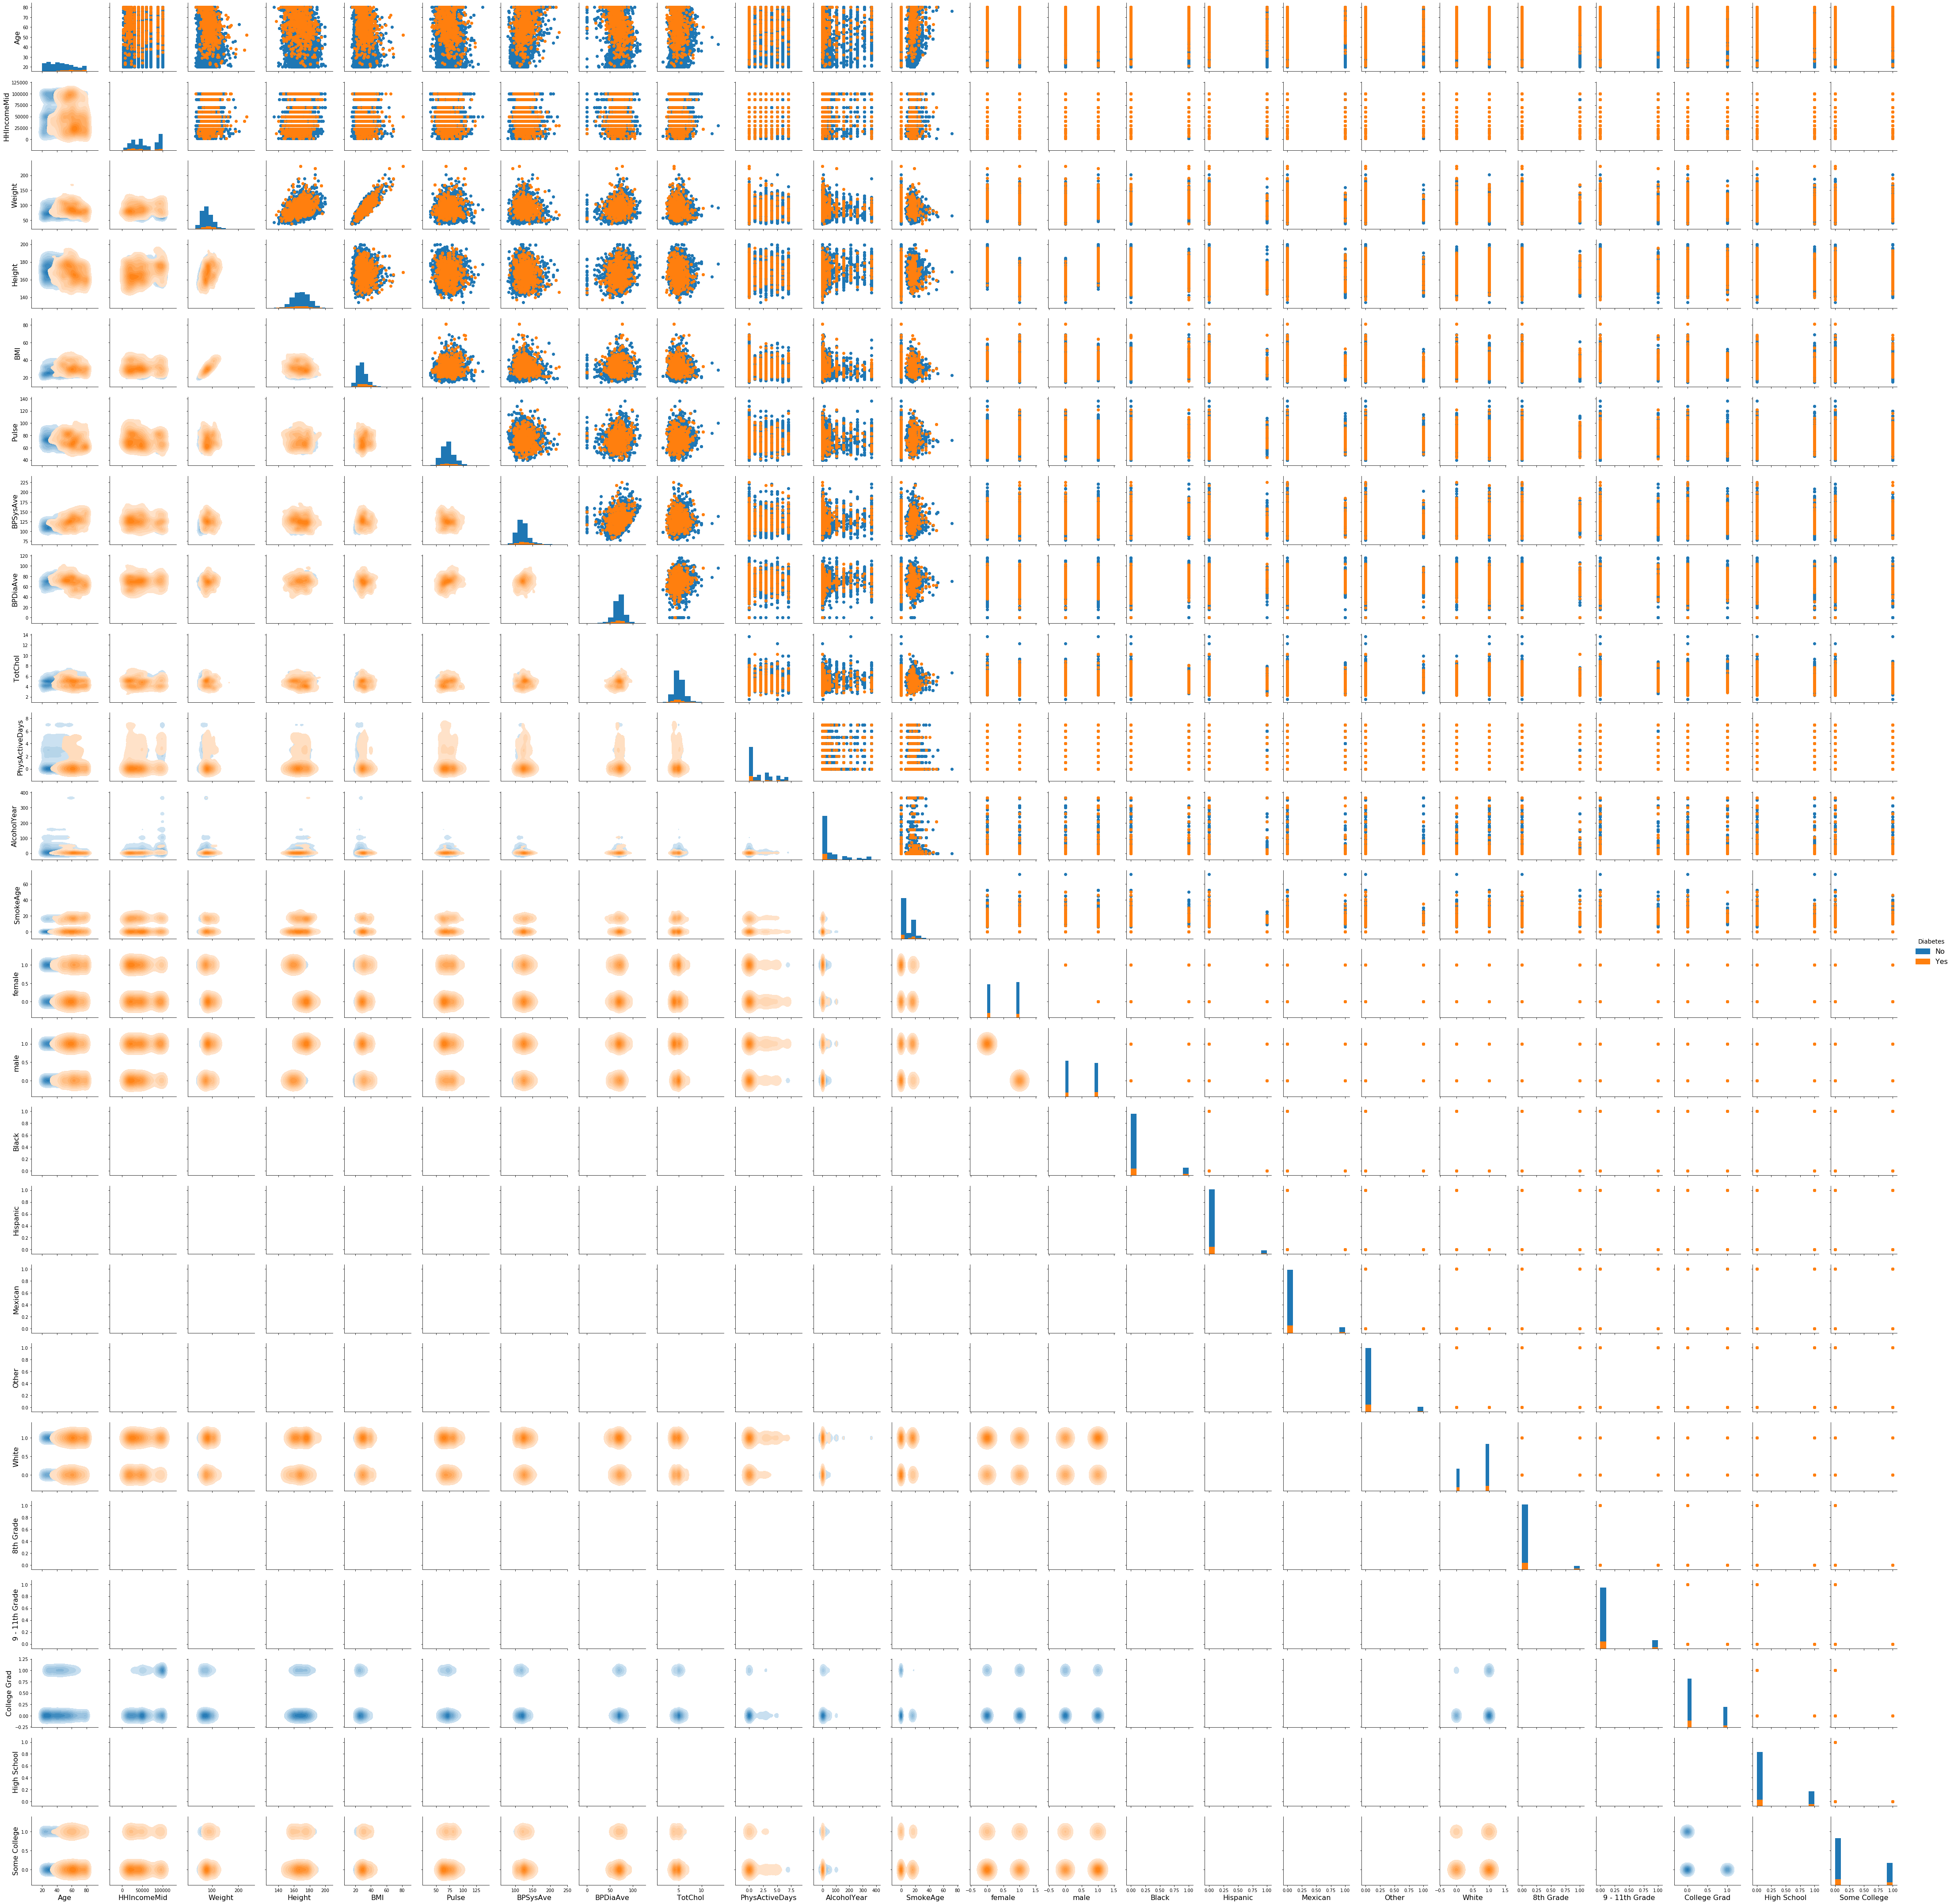

In [264]:
g = sns.PairGrid(data, hue = "Diabetes")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

### Correlation Matrix 

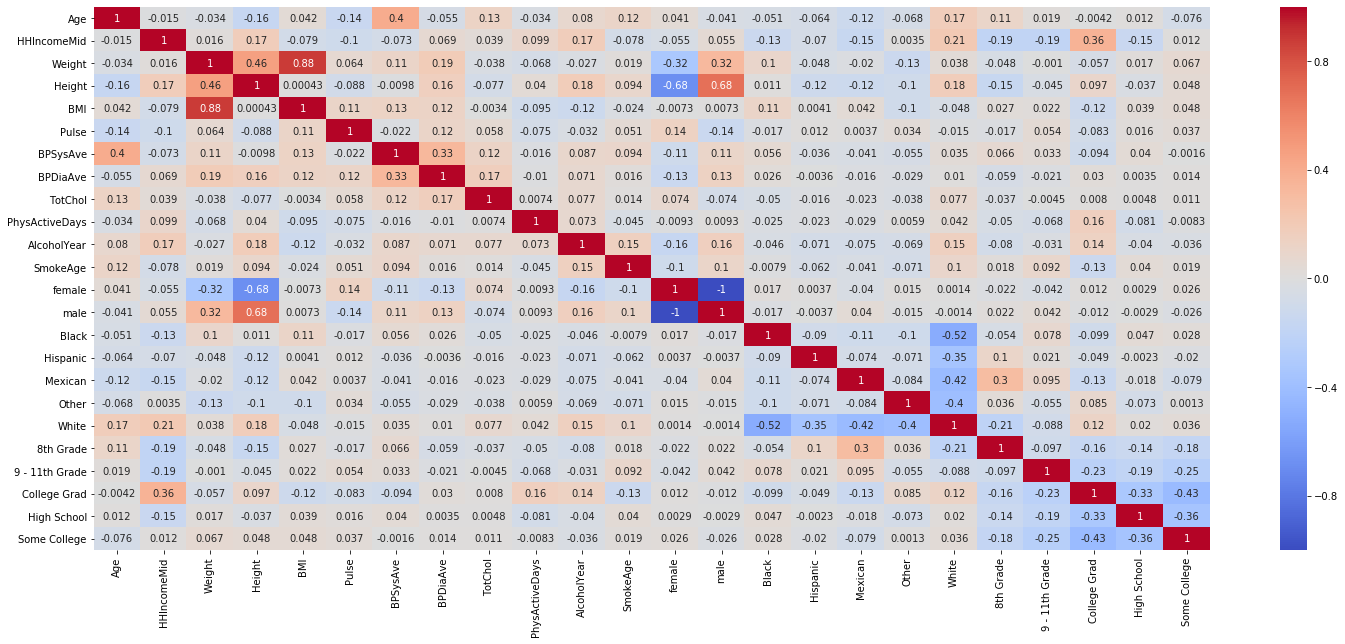

In [32]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm");

The strongest correlations are between 
- `BMI` and `weight`

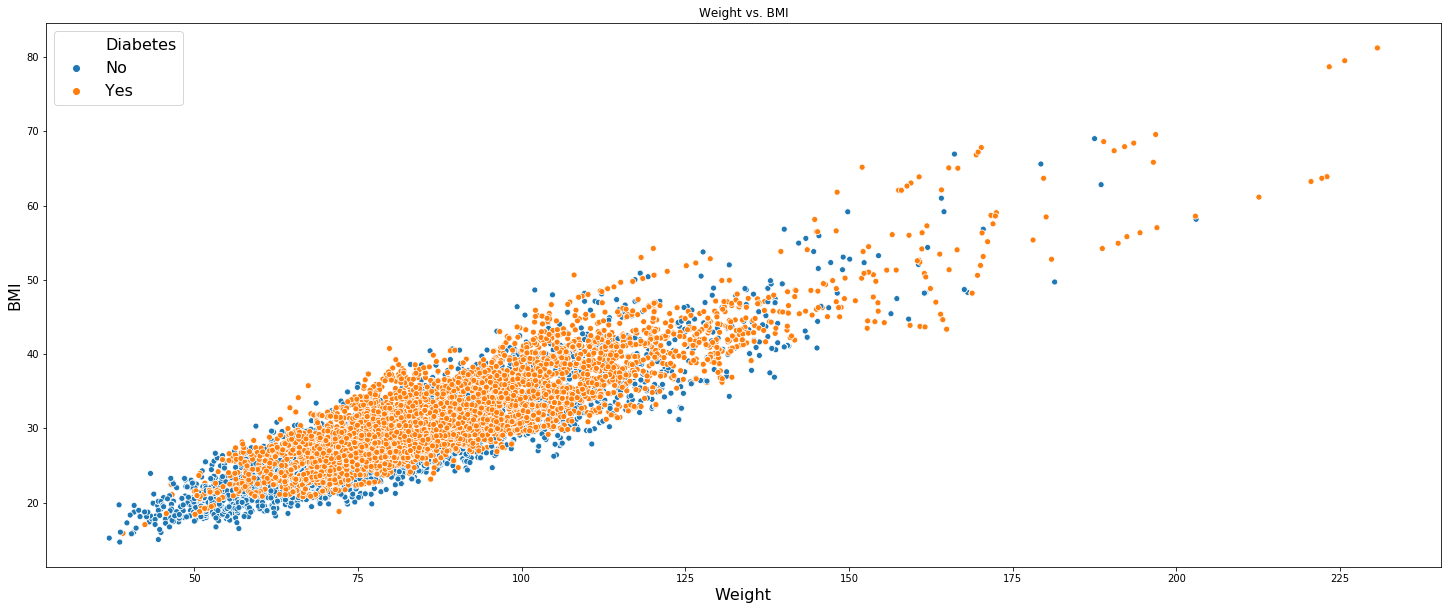

In [57]:
sns.scatterplot(X["Weight"], X["BMI"], hue=y);
plt.title("Weight vs. BMI");

Once again, there is very little separation between the two classes even when comparing the strongly correlated variables.

### Standardizing the data

In [71]:
scale = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scale.transform(X)

In [96]:
y = y.map({"Yes": 1, "No": 0})

### Splitting the data

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
11494   NaN
11495   NaN
11496   NaN
11497   NaN
11498   NaN
11499   NaN
11500   NaN
11501   NaN
11502   NaN
11503   NaN
11504   NaN
11505   NaN
11506   NaN
11507   NaN
11508   NaN
11509   NaN
11510   NaN
11511   NaN
11512   NaN
11513   NaN
11514   NaN
11515   NaN
11516   NaN
11517   NaN
11518   NaN
11519   NaN
11520   NaN
11521   NaN
11522   NaN
11523   NaN
Name: Diabetes, Length: 11524, dtype: float64

## Testing classification models

### GridSearch to automate tuning hyperparameters

Wrote a function below that will take in models and data in order to tune the hyperparameters for me. This will be done in one fell swoop

In [98]:
def GridSearchWrapper(model, param_grid, X, y, n_jobs=-1, cv=10):
    clf_cv = GridSearchCV(model, param_grid=param_grid,
                          n_jobs=n_jobs, cv=cv,
                          scoring='recall_weighted')
    clf = clf_cv.fit(X, y)
    best_params = clf.best_params_
    best_score = round(clf.best_score_, 3)
    print('Best Params: {}\n'
          'Best Score: {}'.format(best_params, best_score))
    return best_params, best_score

### Logistic Regression

In [100]:
lg_best_params, lg_best_score = GridSearchWrapper(model=LogisticRegression(),
                                                  param_grid=dict(penalty=["l1"]),
                                                  X=X_train,
                                                  y=y_train
)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [103]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr.score(X_test, y_test)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8973880597014925

### SVM

In [77]:
svc_best_params, svc_best_score = GridSearchWrapper(model=SVC(), 
                                                    param_grid=dict(C=[10], kernel=["rbf"]),
                                                    X=X_train,
                                                    y=y_train
                                                   )
svc_best_params['probability'] = True

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Params: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.896


### KNN

In [80]:
knn_best_params, knn_best_score = GridSearchWrapper(model=KNeighborsClassifier(), 
                                                      param_grid=dict(n_neighbors=[200]), 
                                                      X=X_train,
                                                      y=y_train
                                                     )

Best Params: {'n_neighbors': 200}
Best Score: 0.71


### Random Forest

In [78]:
rf_best_params, rf_best_score = GridSearchWrapper(model=RandomForestClassifier(), 
                                                  param_grid=dict(criterion=["entropy"],min_samples_leaf=[15], min_samples_split=[2],max_features=["sqrt"]),
                                                  X=X_train,
                                                  y=y_train
                                                 )

Best Params: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2}
Best Score: 0.924


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Gradient Boosting

In [82]:
gbc_best_params, gbc_best_score = GridSearchWrapper(model=GradientBoostingClassifier(),
                                                      param_grid=dict(loss=["deviance"],
                                                                      learning_rate=[0.1],
                                                                      n_estimators=[100],
                                                                      max_depth=[3],
                                                                      min_samples_split=[2],
                                                                      min_samples_leaf=[1],
                                                                      max_features=["sqrt"]
                                                                     ),
                                                      X=X_train,
                                                      y=y_train
                                                     )

Best Params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.91


## Recall and Decision 

In [84]:
gbc = GradientBoostingClassifier(**gbc_best_params)
gbc_proba = gbc.fit(X_train, y_train).predict_proba(X_test)

In [89]:
recall_nodiab = []
recall_diab = []
precision_nodiab = []
precision_diab = []

for thresh in np.arange(0, 1, 0.01):
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, 
                                                                         np.where(gbc_proba[:,0] > thresh, 0, 1)
                                                                        )
    recall_nodiab, recall_diab = recall
    precision_nodiab, precision_diab = precision

    recall_nodiab.append(recall_nodiab)
    recall_diab.append(recall_diab)

    precision_nodiab.append(precision_nodiab)
    precision_diab.append(precision_diab)


TypeError: '<' not supported between instances of 'int' and 'str'

In [90]:
gbc_proba

array([[0.35096619, 0.64903381],
       [0.67743621, 0.32256379],
       [0.02659531, 0.97340469],
       ...,
       [0.00789828, 0.99210172],
       [0.25454572, 0.74545428],
       [0.28059167, 0.71940833]])